In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
# Import modules to declare columns and column data types
from sqlalchemy import Column, Integer, String, Float

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
data_measurement = engine.execute("SELECT * FROM measurement")
    
# Query All Records in the the measurement
measurement_df = pd.read_sql("SELECT * FROM measurement", conn)
measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [9]:
# DataFrame column type check
measurement_df.dtypes

id           int64
station     object
date        object
prcp       float64
tobs       float64
dtype: object

In [10]:
# Query All Records in the the station
station_df = pd.read_sql("SELECT * FROM station", conn)
station_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [11]:
# DataFrame column type check
station_df.dtypes

id             int64
station       object
name          object
latitude     float64
longitude    float64
elevation    float64
dtype: object

In [12]:
# Merge the dataFrames
combined_data = pd.merge(measurement_df, station_df, on="station", how="inner")
del combined_data['id_x']
del combined_data['id_y']
combined_data.head()

,station,date,prcp,tobs,name,latitude,longitude,elevation
0,USC00519397,2010-01-01,0.08,65.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00519397,2010-01-02,0.00,63.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,USC00519397,2010-01-03,0.00,74.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,USC00519397,2010-01-04,0.00,76.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,USC00519397,2010-01-06,NaN,73.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date

last_date

'2017-08-23'

In [166]:
# First Date
first_date = session.query(Measurement.date).order_by(Measurement.date).first().date
first_date

'2010-01-01'

In [18]:
from datetime import datetime, timedelta

date_365_days_ago = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)
date_365_days_ago.date



<function datetime.date>

In [19]:
# Selecting last 1 year using session.query 
# Perform a query to retrieve the data and precipitation scores
q12 = session.query(Measurement.date, func.avg(Measurement.prcp)).\
                    filter(Measurement.date >= date_365_days_ago).\
                    group_by(Measurement.date).all()
q12

[('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 

In [20]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_q12 = pd.DataFrame(q12, columns=['date', 'precipitation'])
df_q12.head(10)

,date,precipitation
0,2016-08-24,1.555000
1,2016-08-25,0.077143
2,2016-08-26,0.016667
3,2016-08-27,0.064000
4,2016-08-28,0.516667
5,2016-08-29,0.243333
6,2016-08-30,0.011667
7,2016-08-31,0.636000
8,2016-09-01,0.006000
9,2016-09-02,0.050000


In [21]:
# Sort the dataframe by date
df_q12 = df_q12.sort_values(by='date')
df_q12.set_index('date', inplace=True)
df_q12.head(10)

,precipitation
date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
2016-08-29,0.243333
2016-08-30,0.011667
2016-08-31,0.636000
2016-09-01,0.006000


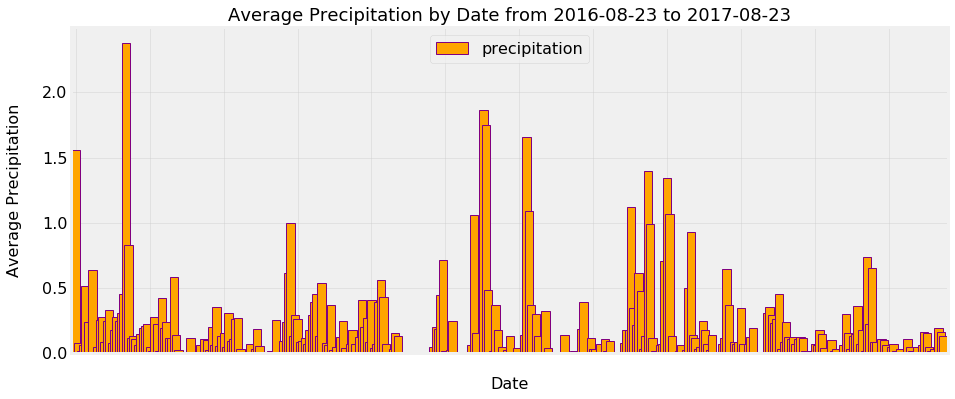

In [30]:
# Use Pandas Plotting with Matplotlib to plot the data
import matplotlib.ticker as ticker

ax = df_q12.plot(kind='bar', width=3.5, figsize=(14,6), color = 'orange', edgecolor='purple', linewidth=1)
ax.tick_params(axis='y', labelsize=16)
plt.locator_params(axis='x', nbins=12)
ax.xaxis.set_major_formatter(plt.NullFormatter())
# ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=6))
# ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter(">%d<"))
# ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
# x_axis = ['2016-08-24', '2016-08-24', '2016-10-24', '2016-11-24', '2016-12-24', '2017-01-24', '2017-02-24', '2017-03-24', '2017-04-24', '2017-05-24', '2017-06-24', '2017-07-24']
# ticks = np.arange(len(x_axis))

# Set Labels & Title
plt.ylabel("Average Precipitation", labelpad=20, size=16)
plt.xlabel("Date", labelpad=20, size=16)
plt.title("Average Precipitation by Date from 2016-08-23 to 2017-08-23", size=18)
plt.grid(True, alpha = 0.4)
plt.legend(bbox_to_anchor=(.6,1), fontsize="16")
# plt.xticks(ticks, x_axis, rotation=10, fontsize = 14)

# Save Figure
plt.savefig("avr__precipitation_by_date.png")


# Show plot
plt.show()



In [99]:
df_q13 = pd.DataFrame(q12, columns=['date', 'precipitation'])
df_q13.head(10)

#efficient way to extract year from string format date
df_q13['year'] = pd.DatetimeIndex(df_q13['date']).year

#efficient way to extract month from string format date
df_q13['month'] = pd.DatetimeIndex(df_q13['date']).month
df_q13.head()

,date,precipitation,year,month
0,2016-08-24,1.555000,2016,8
1,2016-08-25,0.077143,2016,8
2,2016-08-26,0.016667,2016,8
3,2016-08-27,0.064000,2016,8
4,2016-08-28,0.516667,2016,8


In [116]:
# Avarage precipitation for each month of the year
df_q13 = df_q13.groupby(['month'], as_index=False)['precipitation'].mean()
df_q13 = pd.DataFrame(df_q13)
import calendar
df_q13['month'] = df_q13['month'].apply(lambda x: calendar.month_abbr[x])
df_q13

,month,precipitation
0,Jan,0.075740
1,Feb,0.225781
2,Mar,0.157887
3,Apr,0.315187
4,May,0.147737
5,Jun,0.119904
6,Jul,0.132918
7,Aug,0.145639
8,Sep,0.280033
9,Oct,0.120344


In [135]:
import plotly.express as px
import plotly.graph_objects as go
df = df_q13


prec = df_q13['precipitation']

fig = px.bar(df, y= 'month', x="precipitation", color="month",  orientation="h", hover_name="month",
             color_discrete_sequence=['#0d0887', '#46039f', '#7201a8', '#9c179e', '#bd3786', '#d8576b', '#ed7953', '#fb9f3a', '#fdca26', '#f0f921', '#c3f921', '#94f921'],
             title="Average precipitation for each month of the year"
            )

fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    ),
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)



fig.show()

In [141]:
# Histogram with Plotly Express
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df_q12, x="precipitation",
                   nbins=40,
                   title='Histogram of Precipitation',
                   labels={'precipitation':'precipitation', }, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color = 'precipitation'
#                    color_discrete_sequence=['#0d0887', '#46039f', '#7201a8', '#9c179e', '#bd3786', '#d8576b', '#ed7953', '#fb9f3a', '#fdca26', '#f0f921', '#EB89B5'] # color of histogram bars
                   )


fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    ),
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

               
fig.show()

![precipitation](Images/precipitation.png)

In [147]:
# Use Pandas to print the summary statistics for the precipitation data for a year.
df_q12.describe()

,precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [167]:
# Use Pandas to print the summary statistics for the precipitation data from '2010-01-01' to '2017-08-23'.
measurement_df[['prcp']].describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


![describe](Images/describe.png)

In [168]:
# Design a query to show how many stations are available in this dataset?
stations_count = session.query(Station.id).count()
stations_count

9

In [174]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
active_stations  = pd.DataFrame(active_stations, columns=['station', 'counts'])
active_stations

,station,counts
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [187]:
# List the stations and the counts in descending order with names of stations.
active_df = combined_data.groupby(['station','name'])['name'].count()
active_df = pd.DataFrame(active_df)
active_df.rename(columns={'name': 'counts'}, inplace=True)
active_df = active_df.sort_values(by='counts', ascending=False)
active_df

,,counts
station,name,
USC00519281,"WAIHEE 837.5, HI US",2772
USC00519397,"WAIKIKI 717.2, HI US",2724
USC00513117,"KANEOHE 838.1, HI US",2709
USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
USC00517948,"PEARL CITY, HI US",1372
USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [150]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [151]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [152]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [153]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [154]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [155]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [156]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [157]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [158]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [159]:
# Plot the daily normals as an area plot with `stacked=False`
